# Assignment 3

### Question 1

#### Question 1a)

In [34]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px
import plotly.graph_objects as go
import sklearn
print(f"NumPy version: {np.__version__}"
      f"\nSciPy version: {sklearn.__version__}")
print("pandas version: ", pd.__version__)
print("sklearn version: ", sklearn.__version__)

NumPy version: 2.2.1
SciPy version: 1.6.1
pandas version:  2.2.3
sklearn version:  1.6.1


#### Question 1b, c ,d)

In [35]:
from IPython.display import display, Math, Latex
df = pd.read_csv("datasets/macdonald.csv")

print(f"shape of dataframe{df.shape}")
print(f"Headers:")
print(f"{df.head()}")


categorical_cols = ['Menu Category', 'Menu Items', 'gOrml', 'Per Serve Size']

numerical_cols = [
    'Energy (kCal)', 'Protein (g)', 'Total fat (g)', 'Sat Fat (g)',
    'Trans fat (g)', 'Cholesterols (mg)', 'Total carbohydrate (g)',
    'Total Sugars (g)', 'Added Sugars (g)', 'Sodium (mg)'
]




category_counts = df['Menu Category'].value_counts()
fig = px.bar(
    x=category_counts.index,
    y=category_counts.values,
    title='Distribution of Menu Categories',
    labels={'x': 'Menu Category', 'y': 'Count'},
    text=category_counts.values
)
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(xaxis_tickangle=-45)
fig.show()

print(f"Part d:")
print("Missing values in nutritional columns:")
missing_counts = df[numerical_cols].isnull().sum()
print(missing_counts)
print()

print(f"Total missing values: {missing_counts.sum()}")
original_rows = len(df)
df_clean = df.dropna(subset=numerical_cols)
cleaned_rows = len(df_clean)
rows_removed = original_rows - cleaned_rows
print(f"Rows removed: {rows_removed}")
print(f"Original dataset: {original_rows} rows")
print(f"Cleaned dataset: {cleaned_rows} rows")

print("No missing values found in nutritional columns.")
df_clean = df.copy()

shape of dataframe(141, 14)
Headers:
  Menu Category              Menu Items gOrml  Per Serve Size  Energy (kCal)  \
0  Regular Menu        McVeggie™ Burger     g           168.0         402.05   
1  Regular Menu    McAloo Tikki Burger®     g           146.0         339.52   
2  Regular Menu  McSpicy™ Paneer Burger     g           199.0         652.76   
3  Regular Menu       Spicy Paneer Wrap     g           250.0         674.68   
4  Regular Menu     American Veg Burger     g           177.0         512.17   

   Protein (g)  Total fat (g)  Sat Fat (g)  Trans fat (g)  Cholesterols (mg)  \
0        10.24          13.83         5.34           0.16               2.49   
1         8.50          11.31         4.27           0.20               1.47   
2        20.29          39.45        17.12           0.18              21.85   
3        20.96          39.10        19.73           0.26              40.93   
4        15.30          23.45        10.51           0.17              25.24   

 

Part d:
Missing values in nutritional columns:
Energy (kCal)             0
Protein (g)               0
Total fat (g)             0
Sat Fat (g)               0
Trans fat (g)             0
Cholesterols (mg)         0
Total carbohydrate (g)    0
Total Sugars (g)          0
Added Sugars (g)          0
Sodium (mg)               1
dtype: int64

Total missing values: 1
Rows removed: 1
Original dataset: 141 rows
Cleaned dataset: 140 rows
No missing values found in nutritional columns.


### Problem 2

#### Problem 2a)

Why standardization is essential:


Nutritional variables are measured in different units (kCal, g, mg) with different scales.
Without standardization, variables with larger numerical ranges (e.g., Energy in 100s of kCal)
would dominate the PCA, giving them artificially high importance.
Standardization ensures each variable contributes equally to the PCA by transforming them
to have mean 0 and standard deviation 1.


(b) Verification of standardization:
Mean of each column (should be ~0):
  Energy (kCal): 0.000000
  Protein (g): 0.000000
  Total fat (g): -0.000000
  Sat Fat (g): 0.000000
  Trans fat (g): 0.000000
  Cholesterols (mg): -0.000000
  Total carbohydrate (g): 0.000000
  Total Sugars (g): -0.000000
  Added Sugars (g): 0.000000
  Sodium (mg): -0.000000

Standard deviation of each column (should be ~1):
  Energy (kCal): 1.003591
  Protein (g): 1.003591
  Total fat (g): 1.003591
  Sat Fat (g): 1.003591
  Trans fat (g): 1.003591
  Cholesterols (mg): 1.003591
  Total carbohydrate (g): 1.003591
  Total Sugars (g): 1.003591
  Added Sugars (g): 1.003591
  Sodium (mg): 1.003591




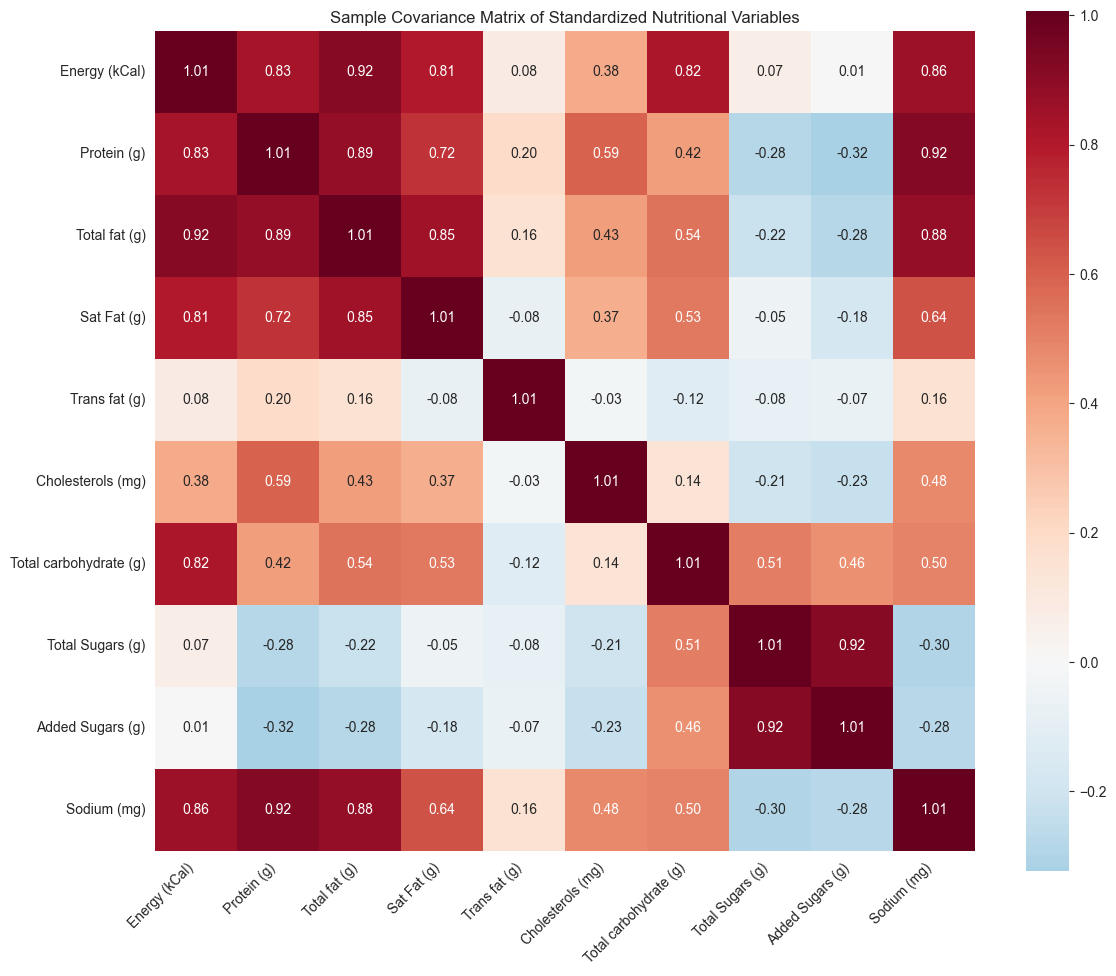


(c) Correlation observations:
- Strongly positively correlated pairs:
  1. Total fat and Sat Fat (both fats)
  2. Total Sugars and Added Sugars (both sugar measures)
- Weakly correlated pair:
  1. Protein and Added Sugars (different nutritional aspects)


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

categorical_cols = ['Menu Category', 'Menu Items', 'gOrml']
nutritional_cols = ['Energy (kCal)', 'Protein (g)', 'Total fat (g)', 'Sat Fat (g)',
                    'Trans fat (g)', 'Cholesterols (mg)', 'Total carbohydrate (g)',
                    'Total Sugars (g)', 'Added Sugars (g)', 'Sodium (mg)']


cat_counts = df['Menu Category'].value_counts()
X_raw = df[nutritional_cols].values
item_names = df['Menu Items'].values
categories = df['Menu Category'].values
df_clean = df.dropna(subset=nutritional_cols)
X_raw_clean = df_clean[nutritional_cols].values
item_names_clean = df_clean['Menu Items'].values
categories_clean = df_clean['Menu Category'].values
# Standardize
#scaler = StandardScaler()
#X = scaler.fit_transform(X_raw)

scaler = StandardScaler()
X = scaler.fit_transform(X_raw_clean)

# Verify standardization
means = X.mean(axis=0)
stds = X.std(axis=0, ddof=1)

print("\n(b) Verification of standardization:")
print(f"Mean of each column (should be ~0):")
for i, (col, mean_val) in enumerate(zip(numerical_cols, means)):
    print(f"  {col}: {mean_val:.6f}")

print(f"\nStandard deviation of each column (should be ~1):")
for i, (col, std_val) in enumerate(zip(numerical_cols, stds)):
    print(f"  {col}: {std_val:.6f}")
print()

print("")
n = X.shape[0]
S = 1 / (n - 1) * (X.T @ X)

plt.figure(figsize=(12, 10))
sns.heatmap(
    S,
    annot=True,
    fmt='.2f',
    xticklabels=numerical_cols,
    yticklabels=numerical_cols,
    cmap='RdBu_r',
    center=0,
    square=True
)
plt.title('Sample Covariance Matrix of Standardized Nutritional Variables')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\n(c) Correlation observations:")
print("- Strongly positively correlated pairs:")
print("  1. Total fat and Sat Fat (both fats)")
print("  2. Total Sugars and Added Sugars (both sugar measures)")
print("- Weakly correlated pair:")
print("  1. Protein and Added Sugars (different nutritional aspects)")

### Question 3

In [37]:
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd


pca = PCA()
#Score matrix:
#Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. The input data is centered but not scaled for each feature before applying the SVD.

#Scores matrix
# or  Transformed data in new PCA space
# here, each food sits on new PCA axes
T = pca.fit_transform(X)

P = pca.components_.T
#Eigenvalues or the "importance" score for each PC
#Eigenvalue over 1 is important
eigenValues = pca.explained_variance_
explainedVarRatio = pca.explained_variance_ratio_
comulativeVar = np.cumsum(pca.explained_variance_ratio_)




# X is Mcdonald nutrition data
print(f"Data matrix X: {X.shape[0]} observations × {X.shape[1]} variables")
print(f"Scores matrix T: {T.shape[0]} observations × {T.shape[1]} components")
print(f"Loadings matrix P: {P.shape[0]} variables × {P.shape[1]} components")

print("\n" + "="*60)
print("VARIANCE EXPLAINED BY EACH COMPONENT")
print("="*60)
for i in range(len(eigenValues)):
    print(f"PC{i+1}: {explainedVarRatio[i]*100:5.2f}% (cumulative: {comulativeVar[i]*100:5.2f}%)")



Data matrix X: 140 observations × 10 variables
Scores matrix T: 140 observations × 10 components
Loadings matrix P: 10 variables × 10 components

VARIANCE EXPLAINED BY EACH COMPONENT
PC1: 50.46% (cumulative: 50.46%)
PC2: 24.42% (cumulative: 74.88%)
PC3: 10.57% (cumulative: 85.45%)
PC4:  7.40% (cumulative: 92.85%)
PC5:  3.68% (cumulative: 96.53%)
PC6:  1.72% (cumulative: 98.24%)
PC7:  0.82% (cumulative: 99.06%)
PC8:  0.54% (cumulative: 99.60%)
PC9:  0.36% (cumulative: 99.96%)
PC10:  0.04% (cumulative: 100.00%)


### Question 4 (Model validation #)

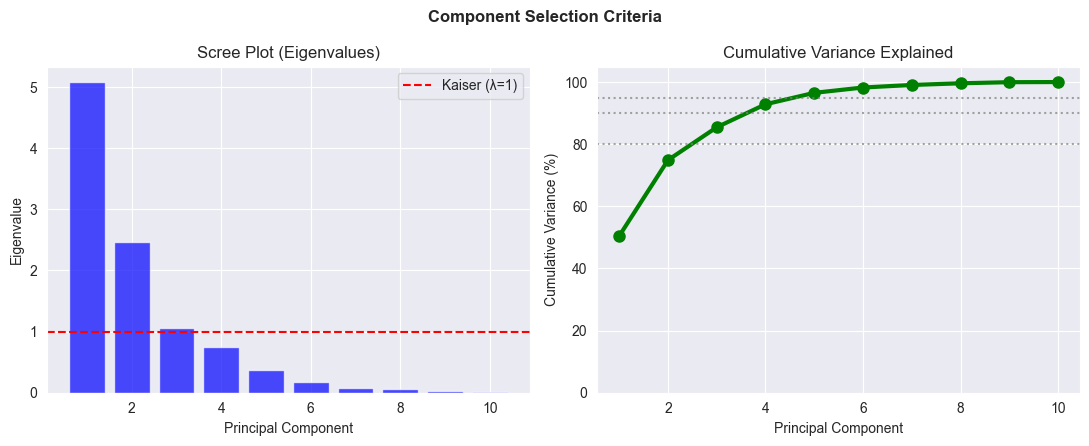

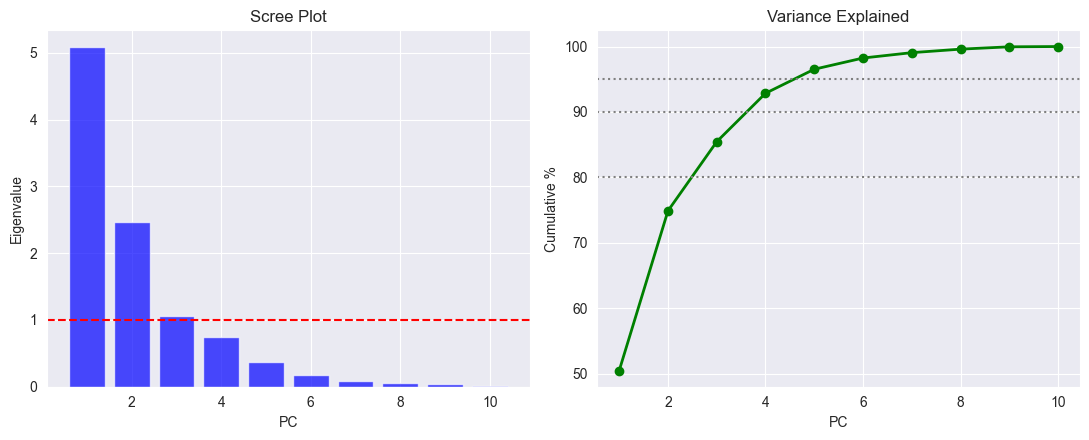


Kaiser: 3 PCs
80% var: 3 PCs
90% var: 4 PCs
COMPONENT SELECTION RECOMMENDATIONS


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [38]:
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex
import numpy as np

P = pca.components_.T
pc_nums = list(range(1, len(eigenValues) + 1))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4.5))
ax1.bar(pc_nums, eigenValues, color='blue', alpha=0.7)
ax1.axhline(1, color='red', linestyle='--', label='Kaiser (λ=1)')
ax1.set(xlabel='Principal Component', ylabel='Eigenvalue',
        title='Scree Plot (Eigenvalues)')
ax1.legend()


ax2.plot(pc_nums, comulativeVar * 100, 'g-o', linewidth=3, markersize=8)
for thresh in [80, 90, 95]:
    ax2.axhline(thresh, color='gray', linestyle=':', alpha=0.7)
ax2.set(xlabel='Principal Component', ylabel='Cumulative Variance (%)',
        title='Cumulative Variance Explained')
ax2.set_ylim(0, 105)

plt.suptitle('Component Selection Criteria', fontweight='bold')
plt.tight_layout()
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4.5))
pc = range(1, len(eigenValues) + 1)

ax1.bar(pc, eigenValues, color='b', alpha=0.7)
ax1.axhline(1, color='r', ls='--')
ax1.set(xlabel='PC', ylabel='Eigenvalue', title='Scree Plot')

ax2.plot(pc, comulativeVar * 100, 'g-o', lw=2)
for thresh in [80, 90, 95]:
    ax2.axhline(thresh, color='gray', ls=':')
ax2.set(xlabel='PC', ylabel='Cumulative %', title='Variance Explained')

plt.tight_layout()
plt.show()

print(f"\nKaiser: {(eigenValues > 1).sum()} PCs")
print(f"80% var: {np.argmax(comulativeVar >= 0.80) + 1} PCs")
print(f"90% var: {np.argmax(comulativeVar >= 0.90) + 1} PCs")

# Print recommendations
n_kaiser = (eigenValues > 1).sum()
n_90 = np.argmax(comulativeVar >= 0.90) + 1
n_80 = np.argmax(comulativeVar >= 0.80) + 1

print("COMPONENT SELECTION RECOMMENDATIONS")
display(Latex(fr"   Kaiser criterion ($\lambda$ > 1):    {n_kaiser} components"))
display(Latex(fr"   80% variance explained:      {n_80} components"))
display(Latex(fr"   90% variance explained:      {n_90} components"))

### Variable Analysis

In [39]:
#**Loadings** tell us how each original variable contributes to each principal component. This is crucial for interpreting what each PC represents.
#nutrient_names = X.columns.tolist()
short_names = ['Energy', 'Protein', 'TotalFat', 'SatFat', 'TransFat',
               'Cholest', 'Carbs', 'Sugars', 'AddSugar', 'Sodium']


#This tells us how each variable is contributing to each principal component
loadings_df = pd.DataFrame(
    P[:, :4],
    index=short_names,
    columns=['PC1', 'PC2', 'PC3', 'PC4']
)
print("="*60)
print("(a) LOADING MATRIX FOR FIRST 4 PCs")
print("="*60)
print(loadings_df.round(4))

(a) LOADING MATRIX FOR FIRST 4 PCs
             PC1     PC2     PC3     PC4
Energy    0.4198  0.1848  0.0465 -0.1201
Protein   0.4192 -0.0954  0.0760  0.1304
TotalFat  0.4284 -0.0219  0.0639 -0.1683
SatFat    0.3745  0.0667 -0.1766 -0.2341
TransFat  0.0477 -0.1138  0.9341  0.1397
Cholest   0.2463 -0.1294 -0.2350  0.8843
Carbs     0.2680  0.4664 -0.0494 -0.1030
Sugars   -0.0849  0.6004  0.0795  0.1663
AddSugar -0.1096  0.5832  0.1167  0.2135
Sodium    0.4126 -0.0632  0.0811 -0.0093


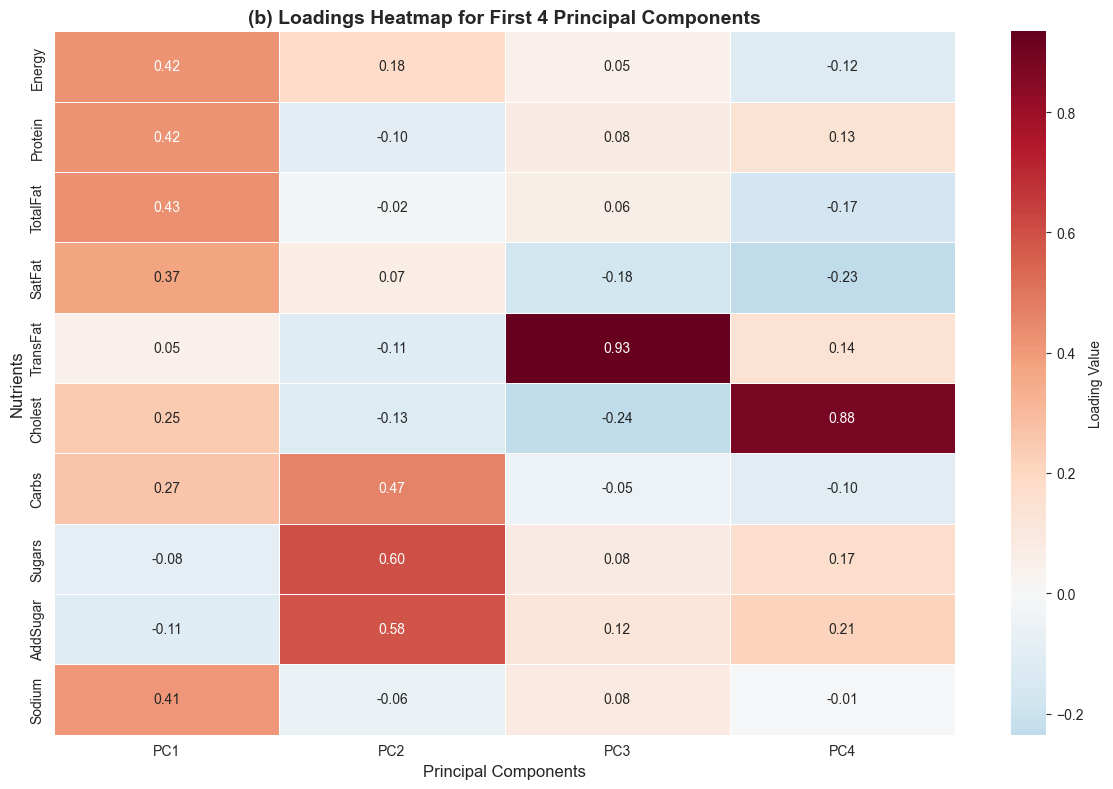


PC1:
  • Total fat (g): 0.42843108806653046
  • Energy (kCal): 0.41981827828864554

PC2:
  • Total Sugars (g): 0.6004122940732594
  • Added Sugars (g): 0.583188476513131


In [40]:
import seaborn as sns

plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(
    loadings_df,
    annot=True,
    fmt='.2f',
    cmap='RdBu_r',
    center=0,
    linewidths=0.5,
    cbar_kws={'label': 'Loading Value'}
)
plt.title('(b) Loadings Heatmap for First 4 Principal Components', fontsize=14, fontweight='bold')
plt.ylabel('Nutrients', fontsize=12)
plt.xlabel('Principal Components', fontsize=12)
plt.tight_layout()
plt.show()


for pc in ['PC1', 'PC2']:
    pc_series = loadings_df[pc]

    # Get top 2 by using absolute value
    sorted_idx = pc_series.abs().sort_values(ascending=False).index[:2]

    print(f"\n{pc}:")
    for nutrient in sorted_idx:
        original_name = numerical_cols[short_names.index(nutrient)] if nutrient in short_names else nutrient
        print(f"  • {original_name}: {pc_series[nutrient]}")

#### Question 5c)

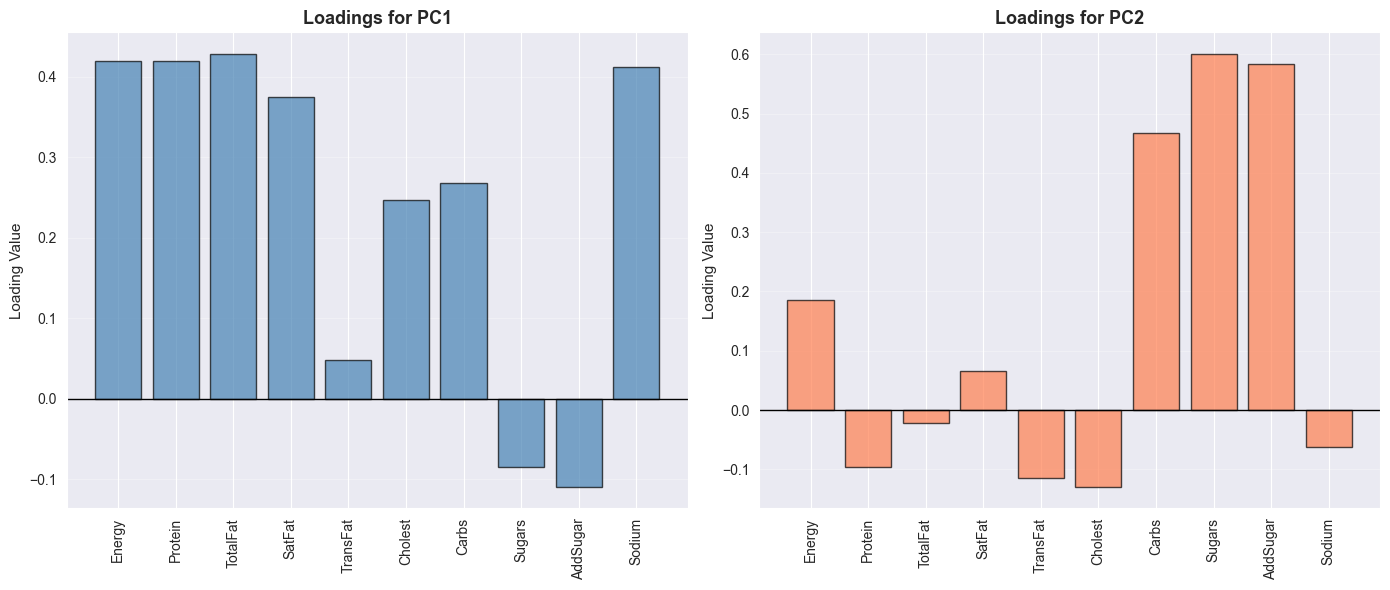

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].bar(loadings_df.index, loadings_df['PC1'],
            color='steelblue', edgecolor='black', alpha=0.7)
axes[0].axhline(y=0, color='black', linewidth=1)
axes[0].set_title('Loadings for PC1', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Loading Value', fontsize=11)
axes[0].tick_params(axis='x', rotation=90)
axes[0].grid(axis='y', alpha=0.3)

axes[1].bar(loadings_df.index, loadings_df['PC2'],
            color='coral', edgecolor='black', alpha=0.7)
axes[1].axhline(y=0, color='black', linewidth=1)
axes[1].set_title('Loadings for PC2', fontsize=13, fontweight='bold')
axes[1].set_ylabel('Loading Value', fontsize=11)
axes[1].tick_params(axis='x', rotation=90)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()



<b> Explain how to interpret the sign of a
loading (positive vs negative) in relation to the score plot. </b>


POSITIVE loading: Foods high in this nutrient will have HIGHER scores on this Principle component.


NEGATIVE loading: Foods high in this nutrient will have LOWER scores on this principle component.


#### Question 5d)

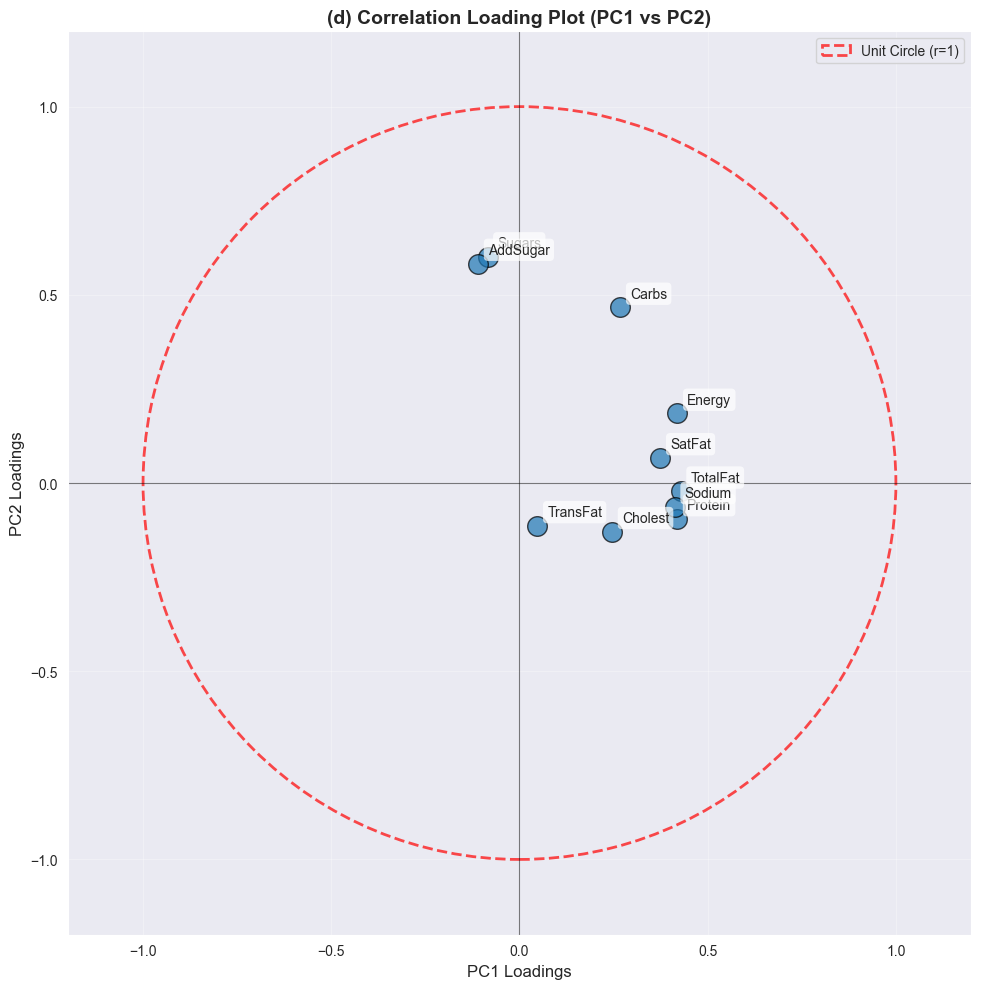

Good pattern here would be that the nutrients is spread in different directions.


In [42]:
plt.figure(figsize=(10, 10))

plt.scatter(loadings_df['PC1'], loadings_df['PC2'],
            s=200, alpha=0.7, edgecolors='black', linewidth=1)

for i, nutrient in enumerate(loadings_df.index):
    plt.annotate(
        nutrient,
        (loadings_df['PC1'].iloc[i], loadings_df['PC2'].iloc[i]),
        xytext=(7, 7),
        textcoords='offset points',
        fontsize=10,
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7, edgecolor="none")
    )

circle = plt.Circle((0, 0), 1, color='red', fill=False,
                    linestyle='--', linewidth=2, alpha=0.7, label='Unit Circle (r=1)')
plt.gca().add_patch(circle)
plt.axhline(y=0, color='black', linewidth=0.8, linestyle='-', alpha=0.5)
plt.axvline(x=0, color='black', linewidth=0.8, linestyle='-', alpha=0.5)

plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.xlabel('PC1 Loadings', fontsize=12)
plt.ylabel('PC2 Loadings', fontsize=12)
plt.title('(d) Correlation Loading Plot (PC1 vs PC2)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()


print("Good pattern here would be that the nutrients is spread in different directions.")


In the plot above variables near the circle (with r = 1) are Well represented by PC1 and PC2, high correlation with these principal components.

On the other hand, variables near the origin are badly represented by PC1 and PC2, most variance captured by other PCs and not well explained by the first two dimensions

DISTANCE FROM ORIGIN = $\sqrt{\text{PC1}^2 + \text{PC2}^2} \approx$  correlation magnitude
IN THIS SITUATION THE ANGLE shows which PC the variable aligns with


### Question 7

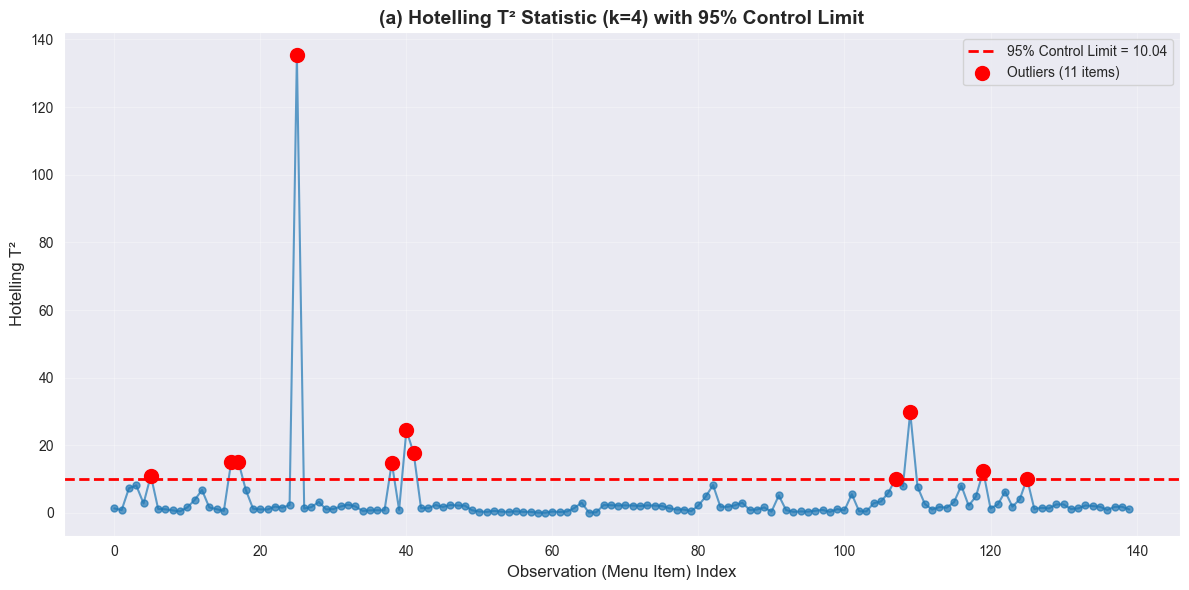


(a) T² RESULTS
95% Control limit (F-distribution): 10.0393
Number of items exceeding limit: 11
Outlier indices: [  5  16  17  25  38  40  41 107 109 119 125]
Outlier menu items: ['Veg Maharaja Mac', 'Mc Egg Masala Burger', 'Mc Egg Burger for Happy Meal', '5 piece Chicken Strips', 'Spicy Egg McMuffin', 'Sausage Mc Muffin with egg', 'Egg McMuffin', 'Chicken Cheese Lava Burger', 'McSpicy Premium Chicken Burger', 'Medium Fanta Orange', 'Medium Sprite']


In [43]:
from scipy.stats import f
k = 4
T_k = T[:, :k]

P_k = P[:, :k]

lambda_k = eigenValues[:k]


# Calculate T² for each observation
T2_scores = []
for i in range(len(T_k)):
    T2 = 0
    for j in range(k):
        T2 += (T_k[i, j]**2) / lambda_k[j]
    T2_scores.append(T2)

T2_scores = np.array(T2_scores)

# Calculate 95% control limit (F-distribution)
n = len(T_k)
alpha = 0.05
F_crit = f.ppf(1-alpha, k, n-k)  # F critical value
T2_limit = (k * (n-1) * (n+1) / (n * (n-k))) * F_crit

# Plot T²
plt.figure(figsize=(12, 6))
plt.plot(T2_scores, 'o-', markersize=5, alpha=0.7)
plt.axhline(y=T2_limit, color='red', linestyle='--', linewidth=2,
            label=f'95% Control Limit = {T2_limit:.2f}')

#Finding indexes of all outliers here::
outliers_T2 = np.where(T2_scores > T2_limit)[0]
plt.scatter(outliers_T2, T2_scores[outliers_T2],
            color='red', s=100, zorder=5, label=f'Outliers ({len(outliers_T2)} items)')

plt.xlabel('Observation (Menu Item) Index', fontsize=12)
plt.ylabel('Hotelling T²', fontsize=12)
plt.title(f'(a) Hotelling T² Statistic (k={k}) with 95% Control Limit', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n{'='*60}")
print(f"(a) T² RESULTS")
print(f"{'='*60}")
print(f"95% Control limit (F-distribution): {T2_limit:.4f}")
print(f"Number of items exceeding limit: {len(outliers_T2)}")
print(f"Outlier indices: {outliers_T2}")
if len(outliers_T2) > 0:
    print(f"Outlier menu items: {df['Menu Items'].iloc[outliers_T2].tolist()}")

#### Question 7b)

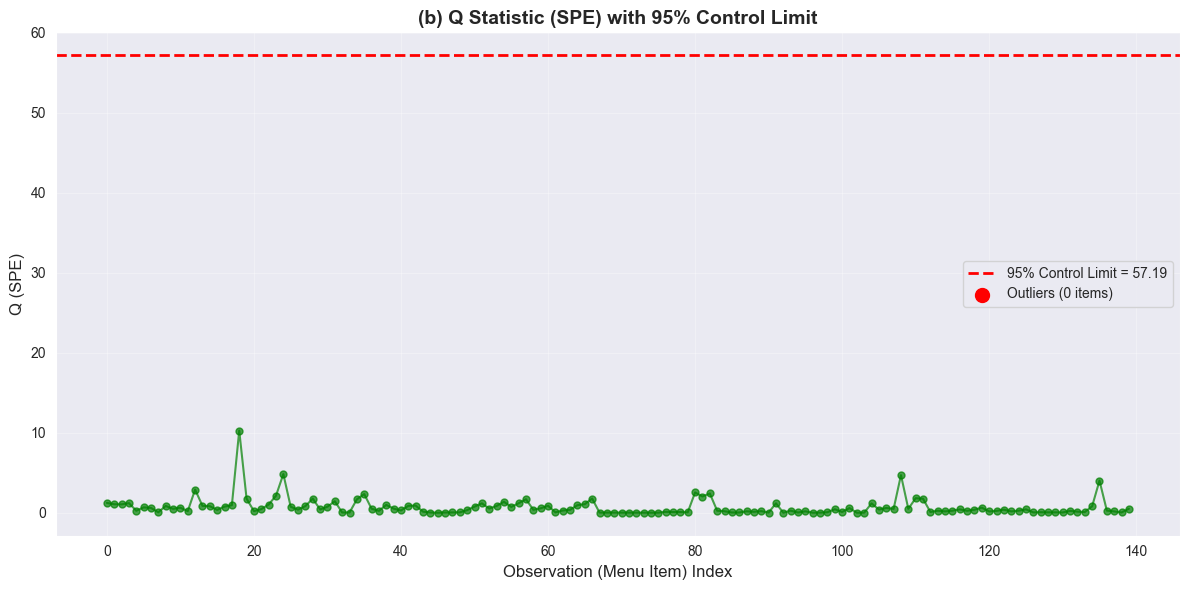


(b) Q STATISTIC RESULTS
95% Control limit (chi-squared): 57.1900
Number of items exceeding limit: 0
Outlier indices: []


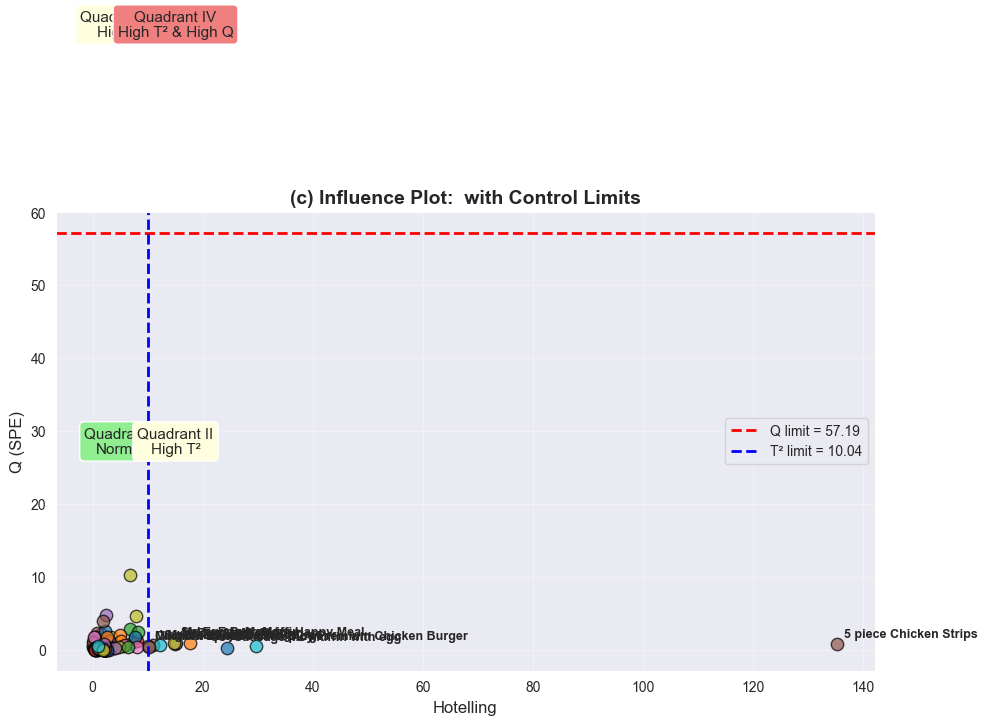

(c) INFLUENCE PLOT QUADRANTS

Quadrant 1st:
  • McVeggie™ Burger
  • McAloo Tikki Burger®
  • McSpicy™ Paneer Burger
  • Spicy Paneer Wrap
  • American Veg Burger
  • Green Chilli Aloo Naan
  • Pizza Puff
  • Mc chicken Burger
  • FILLET-O-FISH Burger
  • Mc Spicy Chicken Burger
  • Spicy Chicken Wrap
  • Chicken Maharaja Mac
  • American Chicken Burger
  • Chicken Kebab Burger
  • Green Chilli Kebab naan
  • Ghee Rice with Mc Spicy Fried Chicken 1 pc
  • McSpicy Fried Chicken 1 pc
  • 4 piece Chicken McNuggets
  • 6 piece Chicken McNuggets
  • 9 piece Chicken McNuggets
  • 2 piece Chicken Strips
  • 3 piece Chicken Strips
  • Regular Fries
  • Medium Fries
  • Large Fries
  • Regular Wedges
  • Medium Wedges
  • Large Wedges
  • L1 Coffee
  • L1 Coffee with milk
  • Double Chocochips Muffin
  • Vanilla Chocochips Muffin
  • Veg McMuffin
  • Double Cheese McMuffin
  • Sausage Mc Muffin
  • Hot Cake with maple syrup
  • Hash Brown
  • Espresso
  • Espresso Machiato
  • Americano (S)
  •

In [44]:
from scipy.stats import chi2


# Reconstruct data from k components
X_reconstructed = T_k @ P_k.T
E = X - X_reconstructed
Q_scores = np.sum(E**2, axis=1)

# Calculate Q limit
theta1 = np.sum(eigenValues[k:])
theta2 = np.sum(eigenValues[k:]**2)
theta3 = np.sum(eigenValues[k:]**3)
h0 = 1 - (2 * theta1 * theta3) / (3 * theta2**2)
z_alpha = chi2.ppf(1-alpha, df=(theta1**2)/theta2)
Q_limit = theta1 * (z_alpha * np.sqrt(2*theta2*h0**2)/theta1 + 1 + theta2*h0*(h0-1)/theta1**2)**(1/h0)

# Plot Q
plt.figure(figsize=(12, 6))
plt.plot(Q_scores, 'o-', markersize=5, alpha=0.7, color='green')
plt.axhline(y=Q_limit, color='red', linestyle='--', linewidth=2,
            label=f'95% Control Limit = {Q_limit:.2f}')

# Highlight outliers
outliers_Q = np.where(Q_scores > Q_limit)[0]
plt.scatter(outliers_Q, Q_scores[outliers_Q],
            color='red', s=100, zorder=5, label=f'Outliers ({len(outliers_Q)} items)')

plt.xlabel('Observation (Menu Item) Index', fontsize=12)
plt.ylabel('Q (SPE)', fontsize=12)
plt.title(f'(b) Q Statistic (SPE) with 95% Control Limit', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n{'='*60}")
print(f"(b) Q STATISTIC RESULTS")
print(f"{'='*60}")
print(f"95% Control limit (chi-squared): {Q_limit:.4f}")
print(f"Number of items exceeding limit: {len(outliers_Q)}")
print(f"Outlier indices: {outliers_Q}")
if len(outliers_Q) > 0:
    print(f"Outlier menu items: {df['Menu Items'].iloc[outliers_Q].tolist()}")

# ===========================================
# (c) Influence Plot (Q vs T²)
# ===========================================

plt.figure(figsize=(10, 8))

for i in range(len(T2_scores)):
    plt.scatter(T2_scores[i], Q_scores[i], alpha=0.7, s=80, edgecolors='black')
    # Add labels for outliers only
    if i in outliers_T2 or i in outliers_Q:
        plt.annotate(df['Menu Items'].iloc[i],
                    (T2_scores[i], Q_scores[i]),
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=9, fontweight='bold')

plt.axhline(y=Q_limit, color='red', linestyle='--', linewidth=2, label=f'Q limit = {Q_limit:.2f}')
plt.axvline(x=T2_limit, color='blue', linestyle='--', linewidth=2, label=f'T² limit = {T2_limit:.2f}')

plt.text(T2_limit/2, Q_limit/2, 'Quadrant I\nNormal',
         ha='center', va='center', fontsize=11, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen"))
plt.text(T2_limit*1.5, Q_limit/2, 'Quadrant II\nHigh T²',
         ha='center', va='center', fontsize=11, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow"))
plt.text(T2_limit/2, Q_limit*1.5, 'Quadrant III\nHigh Q',
         ha='center', va='center', fontsize=11, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow"))
plt.text(T2_limit*1.5, Q_limit*1.5, 'Quadrant IV\nHigh T² & High Q',
         ha='center', va='center', fontsize=11, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral"))

plt.xlabel('Hotelling', fontsize=12)
plt.ylabel('Q (SPE)', fontsize=12)
plt.title('(c) Influence Plot:  with Control Limits', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Identify items in each quadrant
quadrant_items = {'1st': [], '2nd': [], '3rd': [], '4th': []}

for i in range(len(T2_scores)):
    high_T2 = T2_scores[i] > T2_limit
    high_Q = Q_scores[i] > Q_limit

    #Sorting into right quadrant.
    if not high_T2 and not high_Q:
        quadrant_items['1st'].append(i)
    elif high_T2 and not high_Q:
        quadrant_items['2nd'].append(i)
    elif not high_T2 and high_Q:
        quadrant_items['3rd'].append(i)
    elif high_T2 and high_Q:
        quadrant_items['4th'].append(i)

print(f"(c) INFLUENCE PLOT QUADRANTS")
for quadrant, indices in quadrant_items.items():
    if len(indices) > 0:
        print(f"\nQuadrant {quadrant}:")
        for idx in indices:
            print(f"  • {df['Menu Items'].iloc[idx]}")

### Question 8 (Whery much of the task is collected from the suggested solution file)

In [45]:
from ipywidgets import interact, widgets, VBox, HBox, Layout
from IPython.display import display, HTML
from scipy.stats import f as f_dist, chi2

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

COLORS = {
    'mcd_red': '#DA291C',
    'mcd_yellow': '#FFC72C',
    'blue': '#1f77b4',
    'green': '#2ca02c',
    'orange': '#ff7f0e',
    'purple': '#9467bd'
}

CATEGORY_COLORS = {
    'Regular Menu': '#DA291C',
    'McCafe Menu': '#8B4513',
    'Beverages Menu': '#1E90FF',
    'Breakfast Menu': '#FFC72C',
    'Gourmet Menu': '#9932CC',
    'Condiments Menu': '#228B22',
    'Desserts Menu': '#FF69B4'
}


# Create interactive dashboard
class PCADashboard:
    def __init__(self, pca_model, scores_df, loadings_df, df_original, X_standardized,
                 explained_var, eigenvalues, t2_stats, q_stats):
        self.pca = pca_model
        self.scores = scores_df
        self.loadings = loadings_df
        self.df_original = df_original
        self.X_std = X_standardized
        self.explained_var = explained_var
        self.eigenvalues = eigenvalues
        self.t2 = t2_stats
        self.q = q_stats

    def create_dashboard(self):
        """Create the complete interactive dashboard"""

        # Define widget styles
        style = {'description_width': '150px'}
        layout = Layout(width='400px')

        # 1. Overview Section
        overview_widget = widgets.Output()
        with overview_widget:
            self.display_overview()

        # 2. Component Selection Widget
        n_comp_slider = widgets.IntSlider(
            value=2, min=2, max=min(5, self.pca.n_components_),
            description='# Components:',
            style=style, layout=layout
        )

        # 3. Plot Type Selector
        plot_selector = widgets.Dropdown(
            options=[
                'Score Plot',
                'Loading Plot',
                'Biplot',
                'Scree Plot',
                'Explained Variance',
                'Outlier Detection (T² vs Q)',
                'Loading Contributions',
                'T² Contribution',
                'Sample Statistics'
            ],
            value='Score Plot',
            description='Select Plot:',
            style=style,
            layout=layout
        )

        # 4. PC Selector for pairwise plots
        pc_x_selector = widgets.Dropdown(
            options=[f'PC{i+1}' for i in range(min(5, self.pca.n_components_))],
            value='PC1',
            description='X-axis:',
            style=style,
            layout=Layout(width='200px')
        )

        pc_y_selector = widgets.Dropdown(
            options=[f'PC{i+1}' for i in range(min(5, self.pca.n_components_))],
            value='PC2',
            description='Y-axis:',
            style=style,
            layout=Layout(width='200px')
        )

        # 5. Output area for plots
        plot_output = widgets.Output()

        # 6. Insights output
        insights_output = widgets.Output()

        # Interactive update function
        def update_dashboard(plot_type, pc_x, pc_y, n_comps):
            plot_output.clear_output(wait=True)
            insights_output.clear_output(wait=True)

            with plot_output:
                if plot_type == 'Score Plot':
                    self.plot_scores(pc_x, pc_y)
                elif plot_type == 'Loading Plot':
                    self.plot_loadings(pc_x, pc_y)
                elif plot_type == 'Biplot':
                    self.plot_biplot(pc_x, pc_y)
                elif plot_type == 'Scree Plot':
                    self.plot_scree()
                elif plot_type == 'Explained Variance':
                    self.plot_explained_variance(n_comps)
                elif plot_type == 'Outlier Detection (T² vs Q)':
                    self.plot_outliers()
                elif plot_type == 'Loading Contributions':
                    self.plot_loading_contributions(pc_x)
                elif plot_type == 'T² Contribution':
                    self.plot_t2_contributions(n_comps)
                elif plot_type == 'Sample Statistics':
                    self.plot_sample_stats()

            with insights_output:
                self.display_insights(plot_type, pc_x, pc_y, n_comps)

        # Link widgets to update function
        interactive_plot = widgets.interactive_output(
            update_dashboard,
            {
                'plot_type': plot_selector,
                'pc_x': pc_x_selector,
                'pc_y': pc_y_selector,
                'n_comps': n_comp_slider
            }
        )

        # Layout the dashboard
        controls = VBox([
            widgets.HTML('<h3>📊 Dashboard Controls</h3>'),
            plot_selector,
            HBox([pc_x_selector, pc_y_selector]),
            n_comp_slider
        ])

        dashboard = VBox([
            widgets.HTML('<h2 style="text-align:center; color:#DA291C;">🍔 PCA Analysis Dashboard - McDonald\'s Nutrition Data</h2>'),
            widgets.HTML('<hr>'),
            overview_widget,
            widgets.HTML('<hr>'),
            controls,
            plot_output,
            insights_output
        ])

        display(dashboard)

    def display_overview(self):
        """Display key metrics overview"""
        n_samples, n_features = self.X_std.shape
        n_pcs = self.pca.n_components_
        total_var_3pc = np.sum(self.explained_var[:3])

        print(f"""
╔══════════════════════════════════════════════════════════════════════════════╗
║                          📈 ANALYSIS OVERVIEW                                ║
╠══════════════════════════════════════════════════════════════════════════════╣
║  Dataset:              McDonald's India Menu Nutrition                       ║
║  Samples:              {n_samples:3d} menu items                                           ║
║  Variables:            {n_features:3d} nutritional features                                  ║
║  Categories:           7 (Regular, McCafe, Beverages, etc.)                  ║
╠══════════════════════════════════════════════════════════════════════════════╣
║  Principal Components: {n_pcs:3d}                                                         ║
║  Variance (PC1):       {self.explained_var[0]:5.1f}%                                               ║
║  Variance (PC2):       {self.explained_var[1]:5.1f}%                                               ║
║  Variance (PC3):       {self.explained_var[2]:5.1f}%                                               ║
║  Total (3 PCs):        {total_var_3pc:5.1f}%                                               ║
╠══════════════════════════════════════════════════════════════════════════════╣
║  Outliers (T² > 95%):  {np.sum(self.t2 > np.percentile(self.t2, 95)):3d} samples                                     ║
║  Outliers (Q > 95%):   {np.sum(self.q > np.percentile(self.q, 95)):3d} samples                                     ║
╚══════════════════════════════════════════════════════════════════════════════╝
        """)

    def plot_scores(self, pc_x, pc_y):
        """Plot score plot"""
        x_idx = int(pc_x.replace('PC', '')) - 1
        y_idx = int(pc_y.replace('PC', '')) - 1

        fig = px.scatter(
            self.scores, x=f'PC{x_idx+1}', y=f'PC{y_idx+1}',
            color='Category',
            color_discrete_map=CATEGORY_COLORS,
            hover_data=['Item'],
            title=f'Score Plot: {pc_x} vs {pc_y}',
            labels={f'PC{x_idx+1}': f'{pc_x} ({self.explained_var[x_idx]:.1f}%)',
                   f'PC{y_idx+1}': f'{pc_y} ({self.explained_var[y_idx]:.1f}%)'}
        )
        fig.update_layout(height=600, width=900)
        fig.show()

    def plot_loadings(self, pc_x, pc_y):
        """Plot loading plot"""
        x_idx = int(pc_x.replace('PC', '')) - 1
        y_idx = int(pc_y.replace('PC', '')) - 1

        fig = go.Figure()

        for i, var in enumerate(self.loadings.columns):
            fig.add_trace(go.Scatter(
                x=[0, self.loadings.iloc[x_idx, i]],
                y=[0, self.loadings.iloc[y_idx, i]],
                mode='lines+markers+text',
                name=var,
                text=['', var],
                textposition='top center',
                line=dict(width=2),
                marker=dict(size=8)
            ))

        fig.update_layout(
            title=f'Loading Plot: {pc_x} vs {pc_y}',
            xaxis_title=f'{pc_x} Loadings',
            yaxis_title=f'{pc_y} Loadings',
            height=600, width=900,
            showlegend=True
        )
        fig.show()

    def plot_biplot(self, pc_x, pc_y):
        """Plot biplot combining scores and loadings"""
        x_idx = int(pc_x.replace('PC', '')) - 1
        y_idx = int(pc_y.replace('PC', '')) - 1

        # Scale loadings for visibility
        scale = 3

        fig = go.Figure()

        # Add scores
        for cat in self.scores['Category'].unique():
            mask = self.scores['Category'] == cat
            fig.add_trace(go.Scatter(
                x=self.scores.loc[mask, f'PC{x_idx+1}'],
                y=self.scores.loc[mask, f'PC{y_idx+1}'],
                mode='markers',
                name=cat,
                marker=dict(size=8, color=CATEGORY_COLORS.get(cat, '#888888')),
                text=self.scores.loc[mask, 'Item'],
                hovertemplate='%{text}<extra></extra>'
            ))

        # Add loadings as arrows
        for i, var in enumerate(self.loadings.columns):
            fig.add_trace(go.Scatter(
                x=[0, self.loadings.iloc[x_idx, i] * scale],
                y=[0, self.loadings.iloc[y_idx, i] * scale],
                mode='lines+text',
                name=var,
                text=['', var],
                textposition='top center',
                line=dict(width=2, color='red'),
                showlegend=False
            ))

        fig.update_layout(
            title=f'Biplot: {pc_x} vs {pc_y}',
            xaxis_title=f'{pc_x}',
            yaxis_title=f'{pc_y}',
            height=700, width=1000
        )
        fig.show()

    def plot_scree(self):
        """Plot scree plot"""
        fig = go.Figure()

        pcs = [f'PC{i+1}' for i in range(len(self.explained_var))]

        fig.add_trace(go.Bar(
            x=pcs, y=self.explained_var,
            name='Variance Explained',
            marker_color='#DA291C'
        ))

        fig.add_trace(go.Scatter(
            x=pcs, y=np.cumsum(self.explained_var),
            name='Cumulative Variance',
            line=dict(color='#FFC72C', width=3),
            mode='lines+markers'
        ))

        fig.add_hline(y=80, line_dash="dash", line_color="green",
                     annotation_text="80% threshold")

        fig.update_layout(
            title='Scree Plot: Variance Explained by Each PC',
            xaxis_title='Principal Component',
            yaxis_title='Variance Explained (%)',
            height=500, width=900
        )
        fig.show()

    def plot_explained_variance(self, n_comps):
        """Plot cumulative explained variance"""
        cumvar = np.cumsum(self.explained_var[:n_comps])

        fig = go.Figure()
        fig.add_trace(go.Bar(
            x=[f'PC{i+1}' for i in range(n_comps)],
            y=self.explained_var[:n_comps],
            name='Individual',
            marker_color='#DA291C'
        ))

        fig.add_trace(go.Scatter(
            x=[f'PC{i+1}' for i in range(n_comps)],
            y=cumvar,
            name='Cumulative',
            mode='lines+markers',
            line=dict(color='#FFC72C', width=3)
        ))

        fig.update_layout(
            title=f'Explained Variance (First {n_comps} Components)',
            xaxis_title='Component',
            yaxis_title='Variance (%)',
            height=500, width=800
        )
        fig.show()

        print(f"Total variance explained by {n_comps} PCs: {cumvar[-1]:.2f}%")

    def plot_outliers(self):
        """Plot T² vs Q for outlier detection"""
        # Calculate thresholds
        n, p = self.X_std.shape
        alpha = 0.05
        t2_limit = (p * (n-1) / (n-p)) * f_dist.ppf(1-alpha, p, n-p)
        q_limit = np.percentile(self.q, 95)

        fig = go.Figure()

        fig.add_trace(go.Scatter(
            x=self.t2, y=self.q,
            mode='markers',
            marker=dict(
                size=8,
                color=self.scores['Category'].map(CATEGORY_COLORS),
            ),
            text=self.scores['Item'],
            hovertemplate='%{text}<br>T²=%{x:.2f}<br>Q=%{y:.2f}<extra></extra>'
        ))

        fig.add_hline(y=q_limit, line_dash="dash", line_color="red",
                     annotation_text="Q limit (95%)")
        fig.add_vline(x=t2_limit, line_dash="dash", line_color="red",
                     annotation_text="T² limit (95%)")

        fig.update_layout(
            title='Outlier Detection: Hotelling\'s T² vs Q Residual',
            xaxis_title='Hotelling\'s T²',
            yaxis_title='Q Residual (SPE)',
            height=600, width=900
        )
        fig.show()

        outliers_t2 = np.sum(self.t2 > t2_limit)
        outliers_q = np.sum(self.q > q_limit)
        print(f"\n🔍 Outliers detected:")
        print(f"   T² outliers: {outliers_t2}")
        print(f"   Q outliers: {outliers_q}")

    def plot_loading_contributions(self, pc):
        """Plot loading contributions for a specific PC"""
        pc_idx = int(pc.replace('PC', '')) - 1
        loadings = self.loadings.iloc[pc_idx]

        fig = go.Figure()
        fig.add_trace(go.Bar(
            x=loadings.abs().sort_values(ascending=True).index,
            y=loadings.abs().sort_values(ascending=True).values,
            marker_color='#DA291C',
            orientation='h'
        ))

        fig.update_layout(
            title=f'Variable Contributions to {pc} (Absolute Loadings)',
            xaxis_title='Variable',
            yaxis_title='|Loading|',
            height=500, width=800
        )
        fig.show()

    def plot_t2_contributions(self, n_comps):
        """Plot T² contributions"""
        # Get top 10 samples by T²
        top_indices = np.argsort(self.t2)[-10:]

        contributions = []
        for idx in top_indices:
            t2_contrib = (self.scores.iloc[idx, :n_comps]**2 /
                         self.eigenvalues[:n_comps]).values
            contributions.append(t2_contrib)

        fig = go.Figure()

        for i, idx in enumerate(top_indices):
            fig.add_trace(go.Bar(
                name=self.scores.iloc[idx]['Item'][:20],
                x=[f'PC{j+1}' for j in range(n_comps)],
                y=contributions[i]
            ))

        fig.update_layout(
            title='T² Contributions - Top 10 Samples',
            xaxis_title='Component',
            yaxis_title='T² Contribution',
            barmode='group',
            height=600, width=1000
        )
        fig.show()

    def plot_sample_stats(self):
        """Plot sample statistics summary"""
        stats_df = pd.DataFrame({
            'Item': self.scores['Item'],
            'Category': self.scores['Category'],
            'T²': self.t2,
            'Q': self.q
        })

        fig = make_subplots(
            rows=1, cols=2,
            subplot_titles=('Hotelling\'s T² Distribution', 'Q Residual Distribution')
        )

        for cat in stats_df['Category'].unique():
            mask = stats_df['Category'] == cat
            fig.add_trace(
                go.Box(y=stats_df.loc[mask, 'T²'], name=cat,
                      marker_color=CATEGORY_COLORS.get(cat, '#888888')),
                row=1, col=1
            )
            fig.add_trace(
                go.Box(y=stats_df.loc[mask, 'Q'], name=cat,
                      marker_color=CATEGORY_COLORS.get(cat, '#888888'),
                      showlegend=False),
                row=1, col=2
            )

        fig.update_layout(height=500, width=1200, title_text="Sample Statistics by Category")
        fig.show()

    def display_insights(self, plot_type, pc_x, pc_y, n_comps):
        """Display insights based on selected plot"""
        print("\n" + "="*80)
        print(f"💡 INSIGHTS: {plot_type}")
        print("="*80)

        if plot_type == 'Score Plot':
            print(f"""
• {pc_x} explains {self.explained_var[int(pc_x[2:])-1]:.1f}% of variance
• {pc_y} explains {self.explained_var[int(pc_y[2:])-1]:.1f}% of variance
• Look for clusters and patterns among categories
• Samples far from origin have distinctive characteristics
            """)
        elif plot_type == 'Loading Plot':
            print("""
• Arrows show how original variables map to principal components
• Long arrows = strong contribution to the PC
• Arrows pointing same direction = positively correlated variables
• Opposite directions = negatively correlated variables
            """)
        elif plot_type == 'Biplot':
            print("""
• Combines score and loading information
• Sample-variable relationships visible
• Samples in direction of arrow have high values for that variable
            """)
        elif plot_type == 'Scree Plot':
            print(f"""
• Kaiser criterion suggests {np.sum(self.eigenvalues > 1)} components (eigenvalue > 1)
• First 3 PCs explain {np.sum(self.explained_var[:3]):.1f}% of total variance
• Look for "elbow" in cumulative variance curve
            """)
        elif plot_type == 'Outlier Detection (T² vs Q)':
            print("""
• T² measures distance from model center (unusual combinations)
• Q measures distance from model plane (not following the pattern)
• High T² & low Q: extreme but following pattern
• Low T² & high Q: moderate values but unusual pattern
            """)
        elif plot_type == 'Loading Contributions':
            print("""
• Shows which variables most strongly influence the selected PC
• Higher values = more important for this component
• Use for variable selection and interpretation
            """)


score_df = pd.DataFrame(
    T[:, :4],
    columns=['PC1', 'PC2', 'PC3', 'PC4']
)

score_df['Item'] = df['Menu Items']
score_df['Category'] = df['Menu Category']

# Initialize dashboard with computed values
dashboard = PCADashboard(
    pca_model=pca,
    scores_df=score_df,
    loadings_df=loadings_df,
    df_original=df,
    X_standardized=X,
    explained_var=explainedVarRatio * 100,  # Convert to percentage
    eigenvalues=eigenValues,
    t2_stats=T2_scores,
    q_stats=Q_scores
)

# Display the dashboard
dashboard.create_dashboard()